## Closing budgets for thickness, heat, salt and biogeochemical tracers
All done on the native grid

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gsw
import budgetcalcs as bc

In [3]:
# 08990101.heat_salt_o2.1year/
# rootdir = '/archive/gam/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/history/'
rootdir = '/archive/gam/MOM6-examples/ice_ocean_SIS2/Baltic_OM4_025_6h/'
filename = '19000101.ocean_daily.nc'
ds = xr.open_dataset(rootdir+filename).isel(time=0)

In [4]:
# Correct MOM6 tendencies to account for mass in cell
# i.e. convert from [mol kg^-1 m s^-1] to [mol m^-2 s^-1]
rho0=1035.0
# ds['o2h_tendency'] *= rho0
# ds['o2h_tendency_vert_remap'] *= rho0
# ds['o2_advection_xy'] *= rho0
# ds['o2_dfxy_cont_tendency'] *= rho0
# ds['o2_vdiffuse_impl'] *= rho0
# # Remove bottom boundary flux from jo2_plus_btm (already included in o2_vdiffuse_impl)
# jo2_btm = xr.zeros_like(ds.jo2_plus_btm)
# jo2_btm.loc[dict(zl=ds.zl.max())]=ds.o2_btf
# jo2 = ds.jo2_plus_btm - jo2_btm
# jo2.name = 'jo2'
# ds = xr.merge([ds,jo2])
# # HACK SURFACE FLUX FOR NOW #
# ds['o2h_tendency_stf'] = ds['o2h_tendency']-(ds['o2h_tendency_vert_remap']+
#                                               ds['o2_advection_xy']+
#                                               ds['o2_dfxy_cont_tendency']+
#                                               ds['o2_vdiffuse_impl']+
#                                               ds['jo2'])

In [5]:
# Take some subsamples of the output
prof = ds.sel(xh=-150,yh=20,method='nearest').squeeze()
layer = ds.sum(dim=['xh','yh']).squeeze()
slic = ds.sel(zl=100,method='nearest').squeeze()
ksum = ds.sum(dim='zl').squeeze()

***

### Thickness

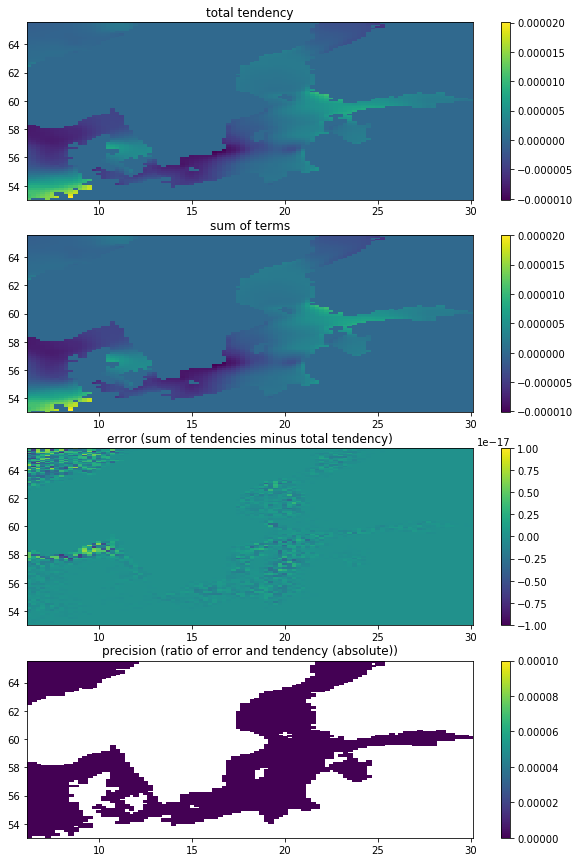

In [12]:
h_terms = ['dhdt','dynamics_h_tendency','vert_remap_h_tendency','boundary_forcing_h_tendency','internal_heat_h_tendency']
tend_sum,error = bc.calc_budget(ksum,h_terms[1:],h_terms[0],omit=['internal_heat_h_tendency'],errors=[-1E-17,1E-17])

***
### Oxygen
#### Vertical sum

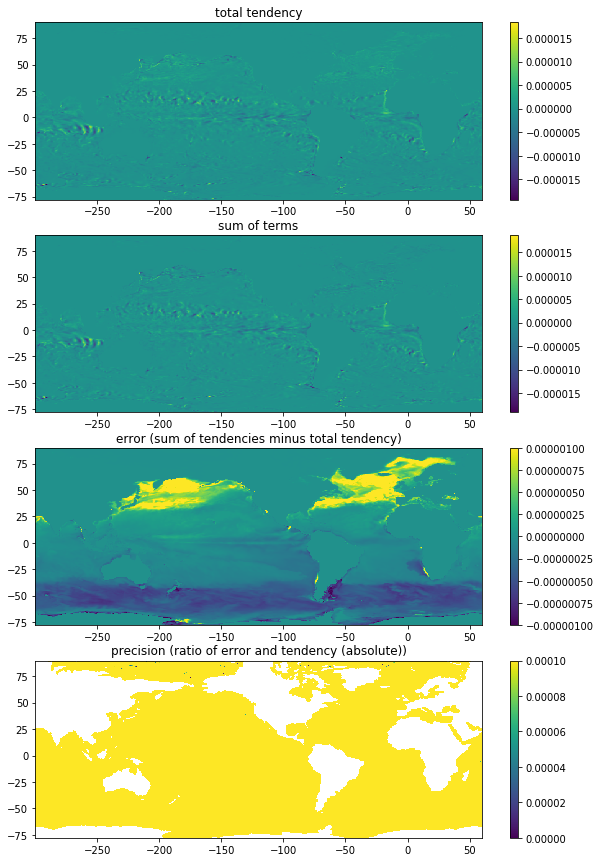

In [5]:
# Oxygen
o2_terms = ['o2_advection_xy','o2h_tendency_vert_remap','o2_dfxy_cont_tendency','o2_vdiffuse_impl','jo2']
tend = 'o2h_tendency'
tend_sum, error = bc.calc_budget(ksum,o2_terms,tend,errors=[-1E-6,1E-6])

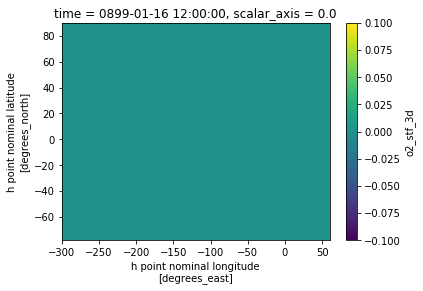

In [9]:
ksum['o2_stf_3d'].plot()

#### Single profile

(<Figure size 360x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b0b4d5fd7b8>)

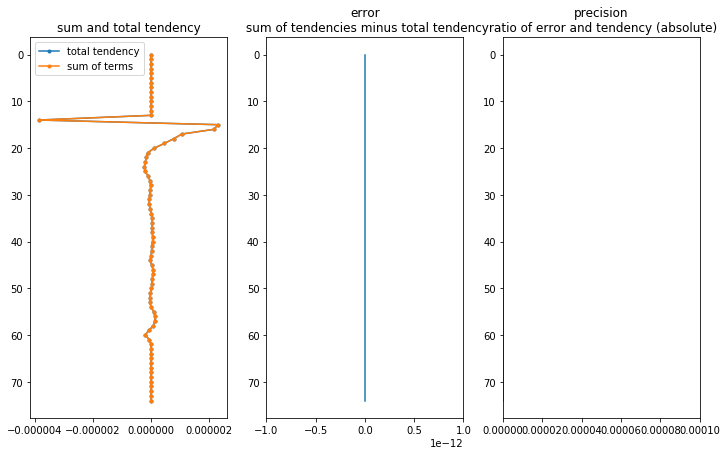

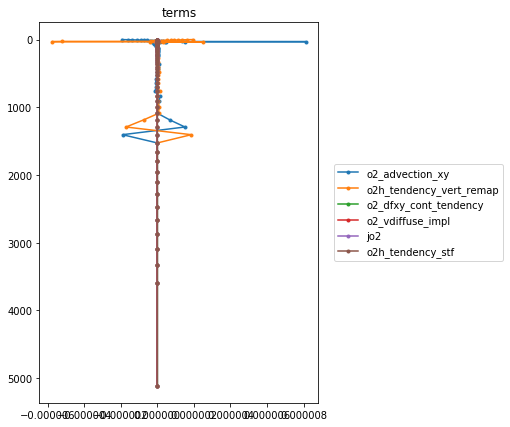

In [8]:
tend_sum, error = bc.calc_budget(prof,o2_terms,tend,omit=[],errors=[-1E-12,1E-12])
bc.plot_budgetterms(prof,o2_terms)

#### Material derivative balanced by diffusion and source/sink terms

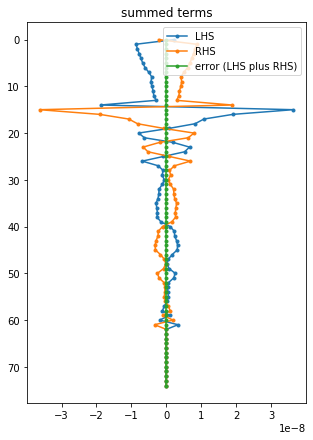

In [11]:
termsLHS = ['o2h_tendency','o2_advection_xy','o2h_tendency_vert_remap']
signsLHS = [-1,1,1]
termsRHS = ['o2_dfxy_cont_tendency','o2_vdiffuse_impl','jo2','o2h_tendency_stf']
signsRHS = [1,1,1,1]
bc.calc_materialderivative(prof,termsLHS,signsLHS,termsRHS,signsRHS);

***
### Heat
#### Vertical sum

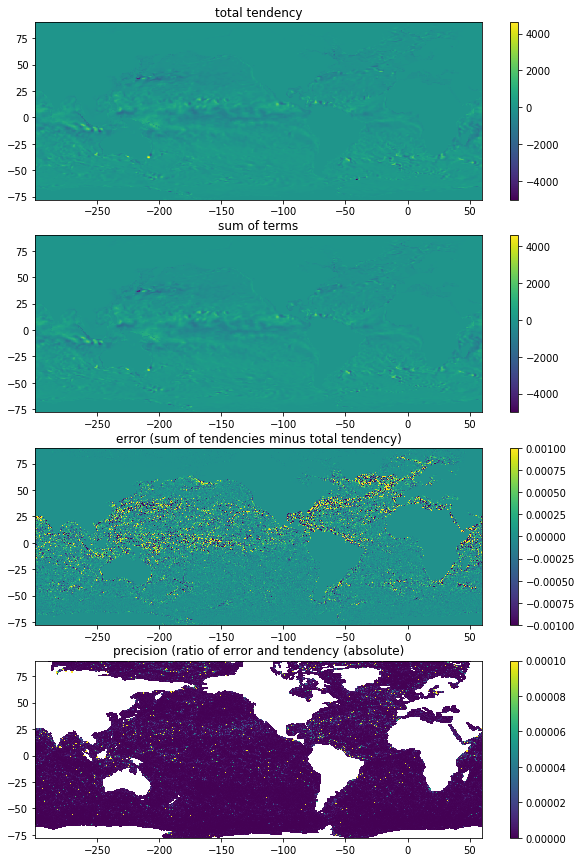

In [81]:
# Heat
heat_terms = ['T_advection_xy','Th_tendency_vert_remap','boundary_forcing_heat_tendency','internal_heat_tend_3d','opottempdiff','opottemppmdiff','frazil_heat_tendency']
tend = 'opottemptend'
tend_sum, error = calc_budget(ksum,heat_terms,tend,errors=[-1E-3,1E-3])

#### Single profile

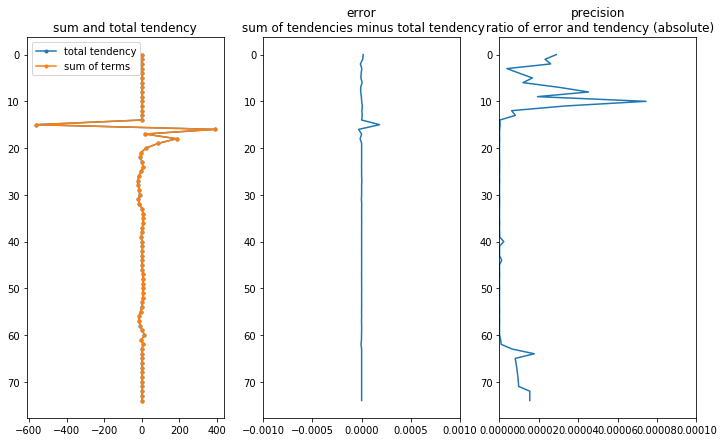

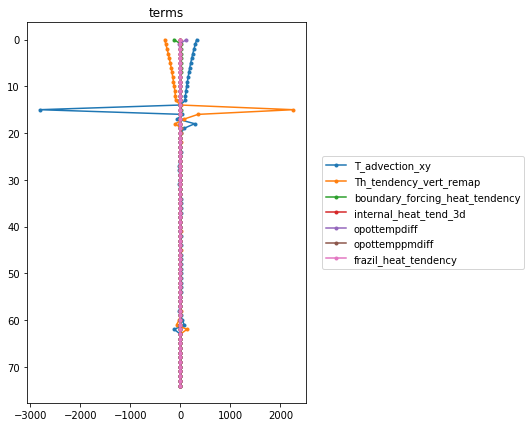

In [82]:
tend_sum, error = calc_budget(prof,heat_terms,tend,omit=[],errors=[-1E-3,1E-3])
plot_budgetterms(prof,heat_terms)

#### Material derivative balanced by diffusion and source/sink terms

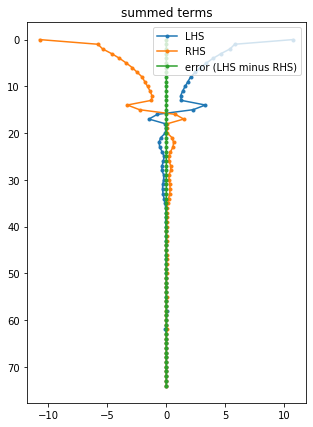

In [29]:
termsLHS = ['opottemptend','T_advection_xy','Th_tendency_vert_remap']
signsLHS = [-1,1,1]
termsRHS = ['boundary_forcing_heat_tendency','internal_heat_tend_3d','opottempdiff','opottemppmdiff','frazil_heat_tendency']
signsRHS = [1,1,1,1,1]
plot_summedterms(prof,termsLHS,termsRHS)

***
### Salt
#### Vertical sum

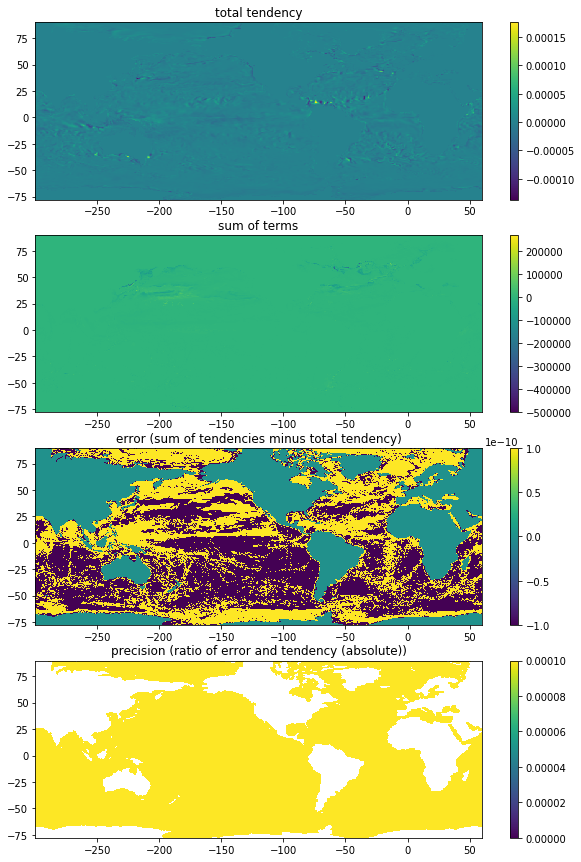

In [3]:
# Salt
salt_terms = ['S_advection_xy','Sh_tendency_vert_remap','boundary_forcing_salt_tendency','osaltdiff','osaltpmdiff']
tend = 'osalttend'
tend_sum, error = bc.calc_budget(ksum,salt_terms,tend,omit=[],errors=[-1E-10,1E-10])

#### Single profile

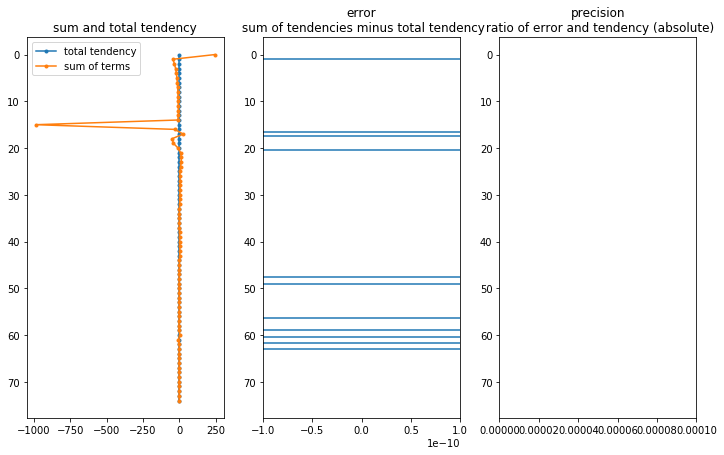

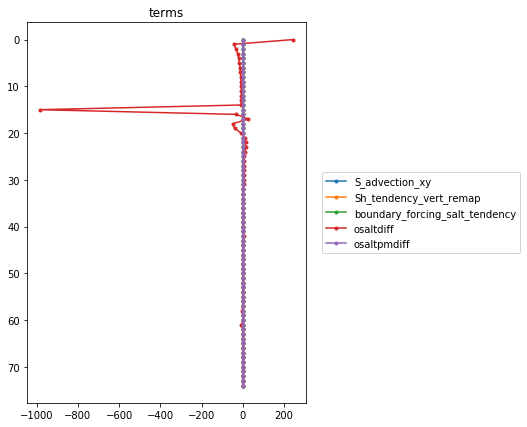

In [4]:
tend_sum, error = bc.calc_budget(prof,salt_terms,tend,omit=[],errors=[-1E-10,1E-10])
bc.plot_budgetterms(prof,salt_terms,omit=[])

In [ ]:
termsLHS = ['osalttend','S_advection_xy','Sh_tendency_vert_remap']
signsLHS = [-1,1,1]
termsRHS = ['boundary_forcing_salt_tendency','osaltdiff','osaltpmdiff']
signsRHS = [1,1,1]
bc.calc_materialderivative(prof,termsLHS,signsLHS,termsRHS,signsRHS,plot=True)

In [12]:
tend

'osalttend'